In [14]:
import cv2
import tensorflow as tf
import os
import imghdr
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [15]:
def load_images_from_directory(directory, target_size=(224, 224), classes_set=None):
    images = []
    labels = []

    # Use a default class mapping if none is provided
    if classes_set is None:
        classes_set = {label: idx + 1 for idx, label in enumerate(os.listdir(directory))}

    # Loop through each class subdirectory
    for label in os.listdir(directory):
        class_dir = os.path.join(directory, label)
        
        if os.path.isdir(class_dir):
            # Loop through each image in the class subdirectory
            for image_file in os.listdir(class_dir):
                image_path = os.path.join(class_dir, image_file)
                
                # Load and resize the image
                with Image.open(image_path) as img:
                    img = img.resize(target_size)  # Resize to target size
                    img_array = np.array(img)  # Convert to numpy array
                    images.append(img_array)  # Append the image array
                    
                    # Append the corresponding encoded label
                    if label in classes_set:
                        labels.append(classes_set[label])  # Convert label to integer

    return np.array(images), np.array(labels)

In [16]:
#train and test data directory
train_data_dir = "split_dataset/train/"
valid_data_dir = "split_dataset/valid/"
test_data_dir = "split_dataset/test/"

In [17]:
class_list =['Ambulance', 'Auto_rikshaw', 'Barricade', 'bicycle', 'Building', 'Bullok_cart', 'bus', 'car', 'cow',
                     'Crane', 'dog', 'Electricity_pole', 'Man_hole', 'motorbike', 'person', 'Road_divider', 'sheep',
                     'Street_light', 'Tempo', 'Tractor', 'traffic light', 'Traffic_sign_board', 'Tree', 'truck',
                     'Zebra_crossing']

class_set = {class_name: idx for idx, class_name in enumerate(class_list)}

In [18]:
class_set

{'Ambulance': 0,
 'Auto_rikshaw': 1,
 'Barricade': 2,
 'bicycle': 3,
 'Building': 4,
 'Bullok_cart': 5,
 'bus': 6,
 'car': 7,
 'cow': 8,
 'Crane': 9,
 'dog': 10,
 'Electricity_pole': 11,
 'Man_hole': 12,
 'motorbike': 13,
 'person': 14,
 'Road_divider': 15,
 'sheep': 16,
 'Street_light': 17,
 'Tempo': 18,
 'Tractor': 19,
 'traffic light': 20,
 'Traffic_sign_board': 21,
 'Tree': 22,
 'truck': 23,
 'Zebra_crossing': 24}

In [19]:
# Load training and validation datasets
X_train, y_train = load_images_from_directory(train_data_dir,target_size=(128, 128), classes_set= class_set)
X_val, y_val = load_images_from_directory(valid_data_dir,target_size=(128, 128), classes_set= class_set)
X_test, y_test = load_images_from_directory(test_data_dir,target_size=(128, 128), classes_set= class_set)

In [20]:
X_train.shape, y_train.shape

((19409, 128, 128, 3), (19409,))

In [21]:
X_train[1], y_train[1]

(array([[[ 70,  79,  96],
         [ 71,  81,  98],
         [ 69,  81,  98],
         ...,
         [ 87, 101, 101],
         [101, 116, 112],
         [108, 123, 117]],
 
        [[ 72,  81,  98],
         [ 72,  82,  99],
         [ 70,  81,  99],
         ...,
         [ 84,  98,  97],
         [ 98, 113, 109],
         [105, 120, 114]],
 
        [[ 76,  85, 102],
         [ 75,  85, 102],
         [ 72,  83, 101],
         ...,
         [ 78,  90,  89],
         [ 93, 105, 100],
         [100, 113, 107]],
 
        ...,
 
        [[ 52,  64,  74],
         [ 50,  63,  72],
         [ 46,  59,  69],
         ...,
         [ 47,  57,  67],
         [ 61,  71,  81],
         [ 70,  80,  89]],
 
        [[ 53,  65,  76],
         [ 51,  64,  75],
         [ 48,  60,  71],
         ...,
         [ 42,  52,  61],
         [ 69,  79,  87],
         [ 84,  94, 103]],
 
        [[ 53,  65,  77],
         [ 52,  64,  76],
         [ 48,  60,  72],
         ...,
         [ 39,  49,  58],
  

In [22]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation


model = Sequential() # create a model with sequential class

# Layers are added sequentialy
# 1st layer: 
model.add(Conv2D(32, kernel_size=(3,3), strides=1, activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D())
model.add(Conv2D(64, kernel_size=(3,3), strides=1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.3))

# 2nd layer: 
model.add(Conv2D(128, kernel_size=(3,3), strides=1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, kernel_size=(3,3), strides=1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.3))

# flatten the data down:
model.add(Flatten())

# Dense 1:
model.add(Dense(32))
model.add(Activation('relu'))

# Dense 2:
model.add(Dense(25, activation='softmax'))


model.compile('adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │        73,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 25)             │           825 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,625 (943.85 KB)

 Trainable params: 241,625 (943.85 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',      # Monitor validation loss
    patience=5,              # Number of epochs to wait for improvement before stopping
    mode='min',
    restore_best_weights=True  # Restore the best weights after stopping
)

In [ ]:
hist = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_val, y_val), callbacks=[early_stopping])

hist.history

Epoch 1/100
607/607 ━━━━━━━━━━━━━━━━━━━━ 225s 366ms/step - accuracy: 0.1545 - loss: 3.8896 - val_accuracy: 0.1862 - val_loss: 2.8215
Epoch 2/100
607/607 ━━━━━━━━━━━━━━━━━━━━ 224s 368ms/step - accuracy: 0.1885 - loss: 2.7643 - val_accuracy: 0.1862 - val_loss: 2.6265
Epoch 3/100
607/607 ━━━━━━━━━━━━━━━━━━━━ 221s 364ms/step - accuracy: 0.1876 - loss: 2.5966 - val_accuracy: 0.1862 - val_loss: 2.5418
Epoch 4/100
607/607 ━━━━━━━━━━━━━━━━━━━━ 221s 365ms/step - accuracy: 0.1856 - loss: 2.5347 - val_accuracy: 0.1862 - val_loss: 2.5050
Epoch 5/100
607/607 ━━━━━━━━━━━━━━━━━━━━ 226s 372ms/step - accuracy: 0.1860 - loss: 2.4994 - val_accuracy: 0.1862 - val_loss: 2.4875
Epoch 6/100
607/607 ━━━━━━━━━━━━━━━━━━━━ 194s 319ms/step - accuracy: 0.1867 - loss: 2.4797 - val_accuracy: 0.1862 - val_loss: 2.4780
Epoch 7/100
607/607 ━━━━━━━━━━━━━━━━━━━━ 199s 328ms/step - accuracy: 0.1838 - loss: 2.4827 - val_accuracy: 0.1862 - val_loss: 2.4723
Epoch 8/100
607/607 ━━━━━━━━━━━━━━━━━━━━ 245s 403ms/step - accuracy: 

In [13]:
model.save("model/model.keras")

In [15]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(X_val,y_val)

# Print the accuracy score
print(f'Test Accuracy: {accuracy * 100:.2f}%')

174/174 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.7520 - loss: 0.9398
Test Accuracy: 77.70%


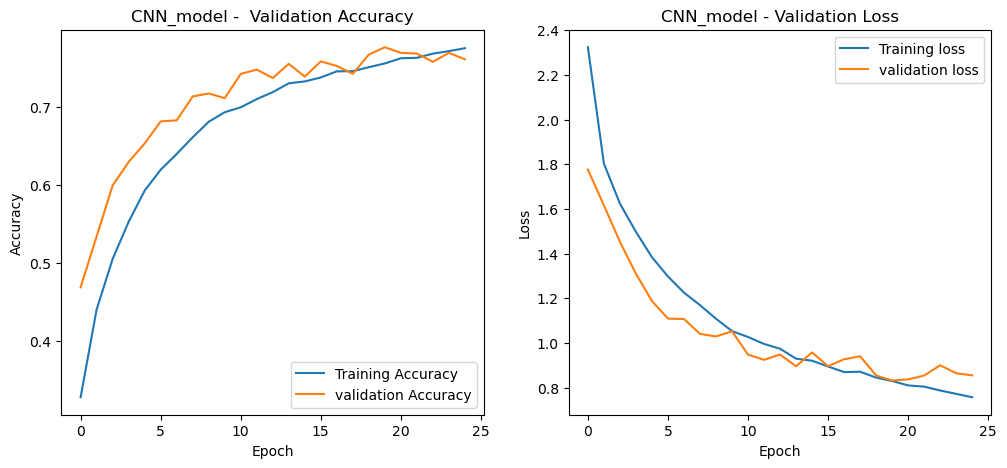

In [16]:
# Plot validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label = 'Accuracy')
plt.plot(hist.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN_model -  Validation Accuracy')
plt.legend(['Training Accuracy','validation Accuracy'])

# Plot validation loss
plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], label='Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('CNN_model - Validation Loss')
plt.legend(['Training loss','validation loss'])
plt.show()

In [20]:
class_label = {0:'Ambulance',
            1:'Auto_rikshaw',
            2:'Barricade',
            3:'bicycle',
            4:'Building',
            5:'Bullok_cart',
            6:'bus',
            7:'car',
            8:'cow',
            9:'Crane',
            10:'dog',
            11:'Electricity_pole',
            12:'Man_hole',
            13:'motorbike',
            14:'person',
            15:'Road_divider',
            16:'sheep',
            17:'Street_light',
            18:'Tempo',
            19:'Tractor',
            20:'traffic light',
            21:'Traffic_sign_board',
            22:'Tree',
            23:'truck',
            24:'Zebra_crossing'}

In [30]:
def preprocess_image(image_path, target_size=(48, 48)):
    # Load and resize the image
    with Image.open(image_path) as img:
        img = img.resize(target_size)  # Resize to match model input size
        img_array = np.array(img)  # Convert to numpy array

    # Normalize image data to [0, 1] range
    img_array = img_array.astype('float32') / 255.0
    # Add a batch dimension to match model input shape
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def predict_and_visualize(model, image_path, classes_set):
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)
    
    # Make a prediction
    prediction = model.predict(preprocessed_image)
    predicted_class_index = np.argmax(prediction, axis=1)[0]

    # Map index to class name
    class_names = list(classes_set.keys())
    predicted_class = class_names[predicted_class_index]
    
    # Load the image again for visualization
    img = Image.open(image_path)
    
    # Plot the image and prediction
    plt.imshow(img)
    plt.title(f"Predicted Class: {predicted_class} ({prediction[0][predicted_class_index]:.2f})")
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


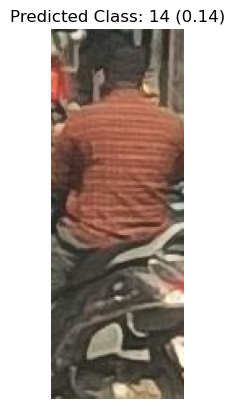

In [52]:
test_image_path = r'split_dataset\test\person\D_458_png.rf.e3eca9ba8052301359c8b3ace6d4065f.jpg'  # Path to a test image
predict_and_visualize(model, test_image_path, classes_set=class_label)

In [47]:
preprocessed_image = preprocess_image(test_image_path)

In [48]:
# Make a prediction
prediction = model.predict(preprocessed_image)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [49]:
prediction[0]*100

array([ 0.5273268 , 14.02345   ,  0.23575926,  1.0367637 ,  4.994056  ,
        0.28965598,  4.5649147 , 12.953684  ,  0.674065  ,  0.15201113,
        0.7384873 ,  1.201213  ,  0.03045429, 13.027241  , 14.609359  ,
        1.7717037 ,  0.59168446,  3.62623   ,  5.94724   ,  0.76852965,
        2.7090724 ,  0.80142546,  4.9833937 ,  9.509818  ,  0.2324659 ],
      dtype=float32)

In [118]:
# Create lists to hold images and labels
predicted_labels = []
actual_labels = []
images = []

# Iterate through the validation dataset
for _ in range(len(valid_dataset)):
    batch_images, batch_labels = next(valid_dataset)
    predictions = model.predict(batch_images)
    
    # Get the predicted class index
    predicted_classes = np.argmax(predictions, axis=1)
    
    # Append the images and labels
    images.extend(batch_images)
    predicted_labels.extend(predicted_classes)
    actual_labels.extend(batch_labels)

# Convert lists to NumPy arrays for easier manipulation
images = np.array(images)
predicted_labels = np.array(predicted_labels)
actual_labels = np.array(actual_labels)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

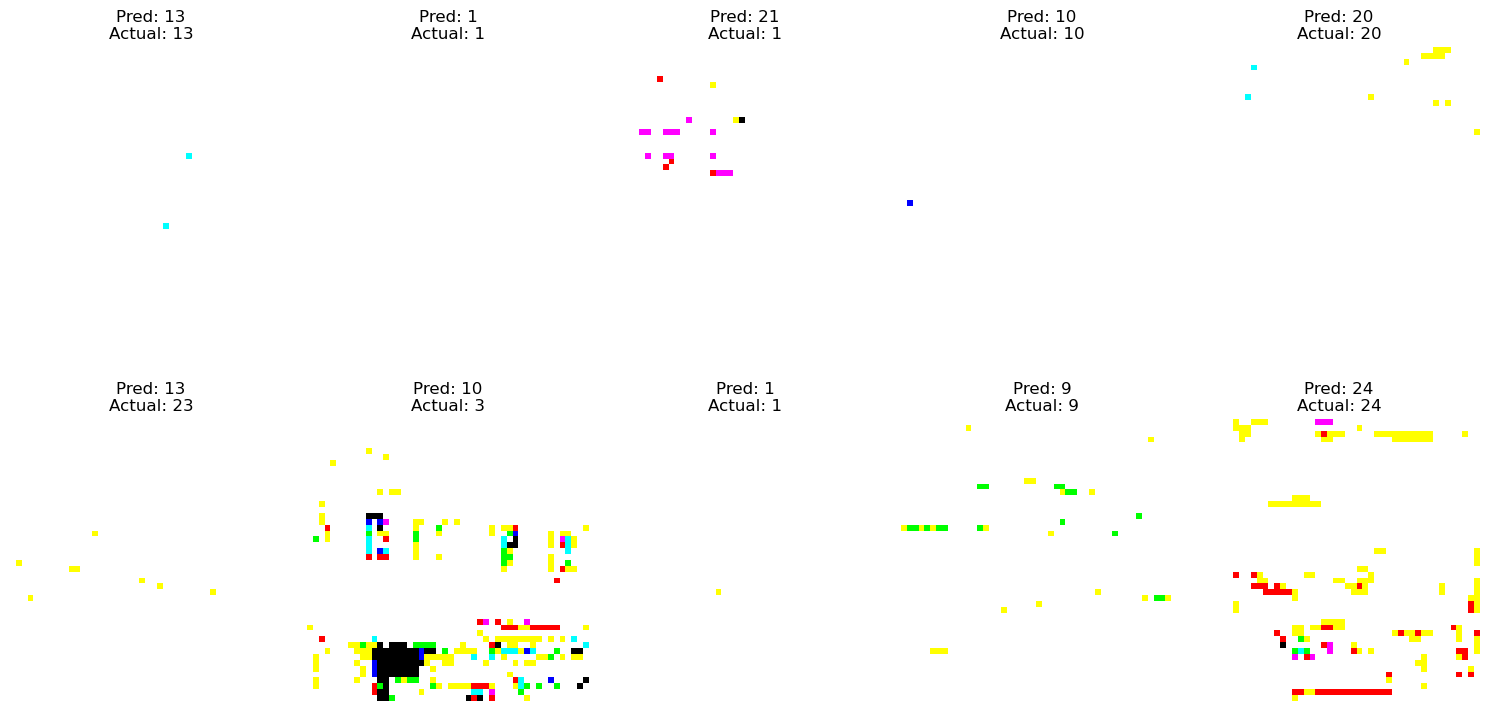

In [122]:
import random
# Step 2: Visualize random predictions
def plot_random_predictions(images, predicted_labels, actual_labels, num_images=10):
    # Get random indices
    random_indices = random.sample(range(len(images)), num_images)

    plt.figure(figsize=(15, 8))
    
    for i, idx in enumerate(random_indices):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[idx])
        plt.title(f'Pred: {predicted_labels[idx]}\nActual: {int(actual_labels[idx])}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Visualize 10 random predictions
plot_random_predictions(images, predicted_labels, actual_labels, num_images=10)